In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tickers = ['MULT3.SA','SBSP3.SA','BRML3.SA','IGTA3.SA','HGTX3.SA','SANB3.SA','CSAN3.SA','PETR3.SA','JHSF3.SA','FHER3.SA']

In [3]:
ohlc = yf.download(tickers)

[*********************100%***********************]  10 of 10 completed


In [4]:
#Preço diário de fechamento do mercado
prices = ohlc["Adj Close"].dropna(how="all")
prices.tail()

,BRML3.SA,CSAN3.SA,FHER3.SA,HGTX3.SA,IGTA3.SA,JHSF3.SA,MULT3.SA,PETR3.SA,SANB3.SA,SBSP3.SA
Date,,,,,,,,,,
2021-08-06,10.06,24.200001,14.900000,37.200001,39.509998,7.71,23.200001,29.110001,19.530001,35.520000
2021-08-09,10.09,24.290001,16.309999,37.060001,39.849998,7.54,23.559999,28.840000,19.700001,35.650002
2021-08-10,9.91,24.299999,15.950000,36.520000,38.360001,7.53,23.090000,28.850000,19.549999,34.820000
2021-08-11,9.90,24.290001,18.139999,37.810001,38.939999,7.35,23.010000,29.299999,19.500000,34.930000
2021-08-12,9.71,23.950001,16.730000,38.490002,37.750000,7.24,22.559999,29.459999,19.450001,34.450001


In [5]:
prices.head()

,BRML3.SA,CSAN3.SA,FHER3.SA,HGTX3.SA,IGTA3.SA,JHSF3.SA,MULT3.SA,PETR3.SA,SANB3.SA,SBSP3.SA
Date,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,8127081.5,NaN,NaN,NaN,3.572875,-9907.129883,4.963095
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.372358,-8826.350586,4.668845
2000-01-05,NaN,NaN,NaN,7501922.5,NaN,NaN,NaN,3.417929,-8826.350586,4.538919
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.390586,-9528.854492,4.516162
2000-01-07,NaN,NaN,NaN,8127081.5,NaN,NaN,NaN,3.417929,-9905.329102,4.579669


In [6]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5411 entries, 2000-01-03 to 2021-08-12
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BRML3.SA  3540 non-null   float64
 1   CSAN3.SA  3902 non-null   float64
 2   FHER3.SA  3528 non-null   float64
 3   HGTX3.SA  2094 non-null   float64
 4   IGTA3.SA  3573 non-null   float64
 5   JHSF3.SA  3523 non-null   float64
 6   MULT3.SA  3466 non-null   float64
 7   PETR3.SA  5348 non-null   float64
 8   SANB3.SA  4640 non-null   float64
 9   SBSP3.SA  5393 non-null   float64
dtypes: float64(10)
memory usage: 465.0 KB


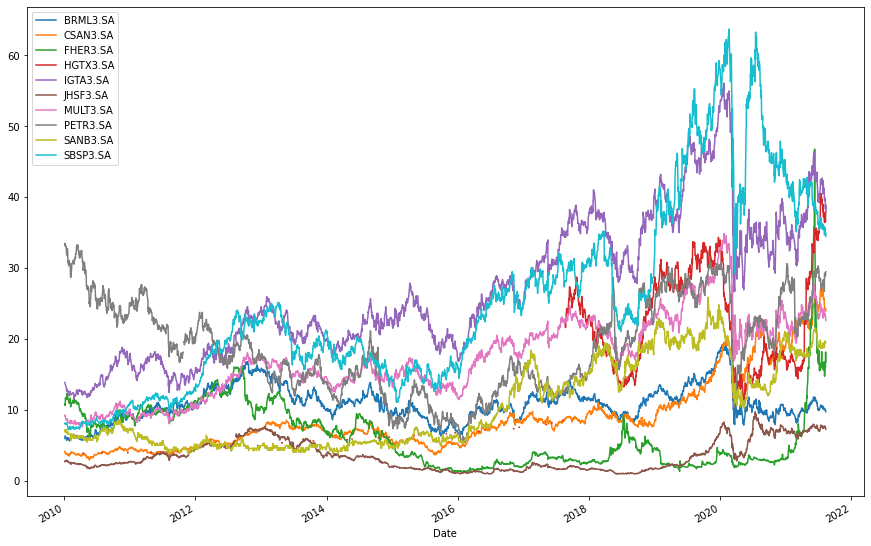

In [7]:
prices[prices.index >= "2010-01-01"].plot(figsize=(15,10));

# Calulando a matriz de Covirância

In [8]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [9]:
# https://pyportfolioopt.readthedocs.io/en/latest/RiskModels.html
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,BRML3.SA,CSAN3.SA,FHER3.SA,HGTX3.SA,IGTA3.SA,JHSF3.SA,MULT3.SA,PETR3.SA,SANB3.SA,SBSP3.SA
BRML3.SA,0.201887,0.071501,0.052060,0.061309,0.089023,0.088137,0.101577,0.093845,0.058904,0.072936
CSAN3.SA,0.071501,0.187750,0.054761,0.038848,0.050540,0.068042,0.068068,0.089743,0.047138,0.058757
FHER3.SA,0.052060,0.054761,0.479017,0.042499,0.039667,0.066339,0.046497,0.066181,0.031288,0.047400
HGTX3.SA,0.061309,0.038848,0.042499,0.553230,0.047874,0.050748,0.052379,0.033225,0.020646,0.032351
IGTA3.SA,0.089023,0.050540,0.039667,0.047874,0.127072,0.067524,0.084373,0.066226,0.045236,0.048564
JHSF3.SA,0.088137,0.068042,0.066339,0.050748,0.067524,0.273024,0.073800,0.082262,0.048689,0.063169
MULT3.SA,0.101577,0.068068,0.046497,0.052379,0.084373,0.073800,0.144954,0.076570,0.037667,0.057033
PETR3.SA,0.093845,0.089743,0.066181,0.033225,0.066226,0.082262,0.076570,0.192985,0.053926,0.070560
SANB3.SA,0.058904,0.047138,0.031288,0.020646,0.045236,0.048689,0.037667,0.053926,0.437785,0.033110
SBSP3.SA,0.072936,0.058757,0.047400,0.032351,0.048564,0.063169,0.057033,0.070560,0.033110,0.158073


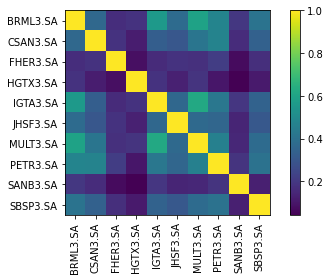

In [10]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

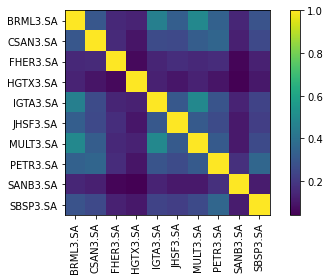

In [11]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

# Retorno Estimado

Conforme discutido nos documentos, geralmente é uma má ideia 
fornecer retornos usando uma estimativa simples como a média de retornos anteriores. 
A menos que você tenha um método proprietário para estimar os retornos, a pesquisa 
sugere que pode ser melhor não fornecer os retornos esperados - você pode então apenas 
encontrar o portfólio min_volatility () ou usar o HRP.
No entanto, neste exemplo, usaremos os retornos do CAPM, que pretende ser um pouco mais 
estável do que o retorno histórico médio padrão. Consulte o bloco de notas 1-RiskReturnModels.ipynb 
para obter mais informações.

In [13]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

BRML3.SA    0.162773
CSAN3.SA    0.139016
FHER3.SA    0.168415
HGTX3.SA    0.232821
IGTA3.SA    0.126413
JHSF3.SA    0.161275
MULT3.SA    0.139123
PETR3.SA    0.142532
SANB3.SA    0.161120
SBSP3.SA    0.123063
Name: mkt, dtype: float64

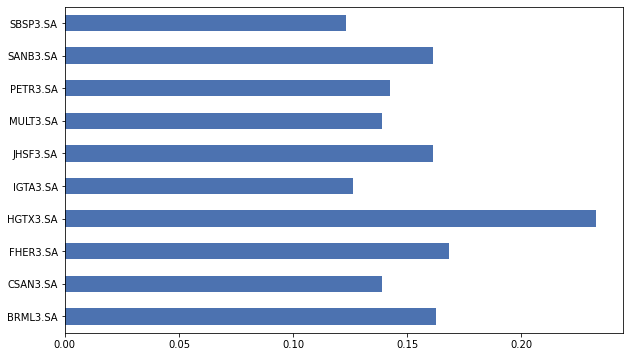

In [14]:
mu.plot.barh(figsize=(10,6));

# Testando o medelo da média exponencial

In [15]:
nu = expected_returns.ema_historical_return(prices)
nu

BRML3.SA    0.012323
CSAN3.SA    0.459709
FHER3.SA    4.817392
HGTX3.SA    1.165442
IGTA3.SA    0.112802
JHSF3.SA    0.525617
MULT3.SA    0.082974
PETR3.SA    0.415677
SANB3.SA    0.247517
SBSP3.SA   -0.101055
Name: 2021-08-12 00:00:00, dtype: float64

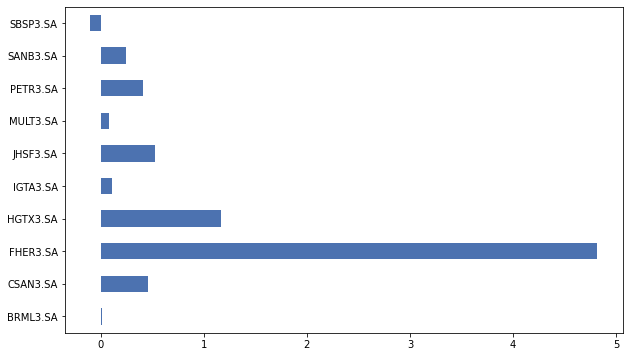

In [16]:
nu.plot.barh(figsize=(10,6));

## Long/short min variance

Variância mínima longa / curta

Nesta seção, construímos uma carteira comprada / vendida com o objetivo de minimizar a variância. Há muitas pesquisas que demonstram que essas carteiras de variância mínima global (GMV) superam as carteiras otimizadas de média-variância.

In [17]:
from pypfopt import EfficientFrontier

In [18]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('BRML3.SA', 0.03212),
             ('CSAN3.SA', 0.14084),
             ('FHER3.SA', 0.08155),
             ('HGTX3.SA', 0.04527),
             ('IGTA3.SA', 0.24631),
             ('JHSF3.SA', 0.07588),
             ('MULT3.SA', 0.16815),
             ('PETR3.SA', 0.01783),
             ('SANB3.SA', 0.06065),
             ('SBSP3.SA', 0.13141)])

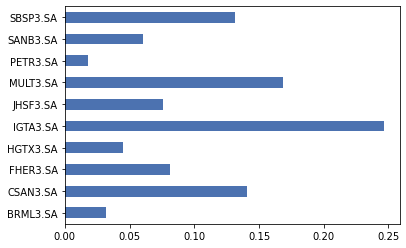

In [19]:
pd.Series(weights).plot.barh();

Podemos obter uma indicação rápida do desempenho do portfólio da seguinte maneira. Observe que esta é uma estimativa da amostra e pode ter muito pouca semelhança com o desempenho real do portfólio! 

In [1]:
ef.portfolio_performance(verbose=True);

NameError: name 'ef' is not defined

In [22]:
prices

,BRML3.SA,CSAN3.SA,FHER3.SA,HGTX3.SA,IGTA3.SA,JHSF3.SA,MULT3.SA,PETR3.SA,SANB3.SA,SBSP3.SA
Date,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,8.127082e+06,NaN,NaN,NaN,3.572875,-9907.129883,4.963095
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.372358,-8826.350586,4.668845
2000-01-05,NaN,NaN,NaN,7.501922e+06,NaN,NaN,NaN,3.417929,-8826.350586,4.538919
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.390586,-9528.854492,4.516162
2000-01-07,NaN,NaN,NaN,8.127082e+06,NaN,NaN,NaN,3.417929,-9905.329102,4.579669
...,...,...,...,...,...,...,...,...,...,...
2021-08-06,10.06,24.200001,14.900000,3.720000e+01,39.509998,7.71,23.200001,29.110001,19.530001,35.520000
2021-08-09,10.09,24.290001,16.309999,3.706000e+01,39.849998,7.54,23.559999,28.840000,19.700001,35.650002
2021-08-10,9.91,24.299999,15.950000,3.652000e+01,38.360001,7.53,23.090000,28.850000,19.549999,34.820000


In [33]:
prices.dropna()

,BRML3.SA,CSAN3.SA,FHER3.SA,HGTX3.SA,IGTA3.SA,JHSF3.SA,MULT3.SA,PETR3.SA,SANB3.SA,SBSP3.SA
Date,,,,,,,,,,
2007-07-27,6.158372,5.177327,25.419790,1.262823,11.648205,7.638789,6.357353,22.916962,-38547.734375,9.159870
2007-07-30,6.205006,5.331026,24.823402,1.269075,11.724588,7.507085,6.429994,24.106949,-38547.734375,9.208558
2007-07-31,6.309246,5.121016,24.442106,1.292831,12.221068,7.540012,6.486492,23.725842,-36025.925781,9.576900
2007-08-07,6.580817,5.331026,26.397474,1.231566,11.342679,7.836342,6.779742,23.060846,-33682.425781,9.949476
2007-08-08,6.745407,5.234097,28.352842,1.240318,11.896445,7.902195,6.994973,23.784176,-34224.625000,10.025684
...,...,...,...,...,...,...,...,...,...,...
2021-08-06,10.060000,24.200001,14.900000,37.200001,39.509998,7.710000,23.200001,29.110001,19.530001,35.520000
2021-08-09,10.090000,24.290001,16.309999,37.060001,39.849998,7.540000,23.559999,28.840000,19.700001,35.650002
2021-08-10,9.910000,24.299999,15.950000,36.520000,38.360001,7.530000,23.090000,28.850000,19.549999,34.820000



# Plotting - Unconstrained

# To plot the unconstrained efficient frontier, it is easiest to use the critical line algorithm.


In [45]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 15.7%
Annual volatility: 23.5%
Sharpe Ratio: 0.58


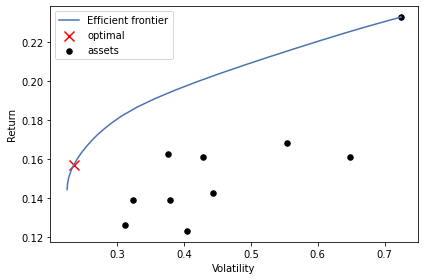

In [46]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [60]:
from pypfopt import EfficientFrontier

In [61]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('BRML3.SA', 0.03212),
             ('CSAN3.SA', 0.14084),
             ('FHER3.SA', 0.08155),
             ('HGTX3.SA', 0.04527),
             ('IGTA3.SA', 0.24631),
             ('JHSF3.SA', 0.07588),
             ('MULT3.SA', 0.16815),
             ('PETR3.SA', 0.01783),
             ('SANB3.SA', 0.06065),
             ('SBSP3.SA', 0.13141)])


## Plotting - Constrained

In this example, we will plot the efficient frontier corresponding to portfolios with a constraint on exposure to MSFT, AMZN, and TSLA (e.g maybe we want to avoid big tech).


In [62]:
import cvxpy as cp

mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S,)
big_tech_indices = [t in {'CSAN3.SA','PETR3.SA','JHSF3.SA'} for t in tickers]
ef.add_constraint(lambda w: cp.sum(w[big_tech_indices]) <= 0.3)

ValueError: Weights is None

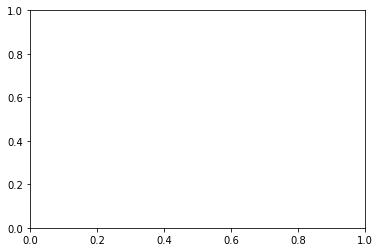

In [66]:
ax = plotting.plot_efficient_frontier(ef, ef_param="risk", 
                                      ef_param_range=np.linspace(0.01, 0.15, 100), 
                                      showfig=False);